<a href="https://colab.research.google.com/github/BarryLiu-97/Machine-Learning/blob/master/sklearn_exp_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN对鸢尾花数据集进行分类，为sklearn的统一数据处理模式

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state = 1)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [0]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [12]:
loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X,data_y)

print(model.predict(data_X[:4,:]))
print(data_y[:4])

[30.00384338 25.02556238 30.56759672 28.60703649]
[24.  21.6 34.7 33.4]


#使用sklearn自带的函数生成数据

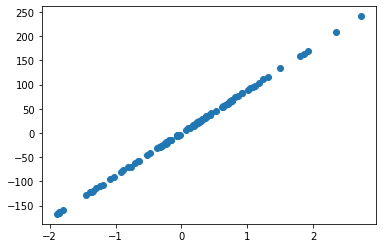

In [14]:
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=1)
plt.scatter(X,y)
plt.show()

In [15]:
print(model.coef_)     #一共输出了多少点
print(model.intercept_)  #与y轴交点
print(model.get_params)  #所定义的model的参数，未定义则是使用初始值

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385090125


In [16]:
print(model.score(data_X,data_y))  #R^2 cofficient of determination

0.7406426641094095


#标准化数据

sklearn中nomalization，即标准化，又叫scale
各种输入特征如果取值范围差距过大，不利于模型拟合，但如果都在相似范围内，让模型更容易处理数据。

In [20]:
from sklearn import preprocessing
a = np.array([[10,2.7,3.6],
        [-100,5,-2],
        [120,20,40]],dtype=np.float64)
print(a)
print(preprocessing.scale(a))

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


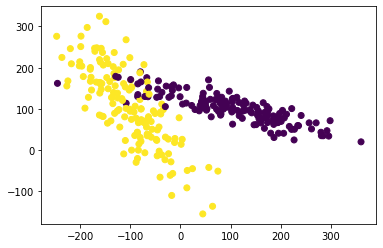

In [35]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2,
                random_state=22, n_clusters_per_class=1, scale=100)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [0]:
#无scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

In [34]:
#有scale
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.9666666666666667


#交叉验证 

In [44]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

from sklearn.model_selection import cross_val_score
knn_2 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_2,iris_X,iris_y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


knn中的k在不同值情况下的得分情况

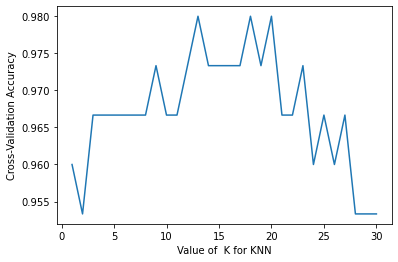

In [60]:
k_range = range(1,31)
k_scores = []
for k in k_range:
  knn_3 = KNeighborsClassifier(n_neighbors=k)
#  loss = -cross_val_score(knn_3, iris_X, iris_y, cv=10, scoring='mean_squared_error')
  scores_2 = cross_val_score(knn_3,iris_X,iris_y,cv=10,scoring='accuracy')
  #cv=10表示分成十份
  k_scores.append(scores_2.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of  K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [0]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())  #该段代码可显示scoring的各种可选值

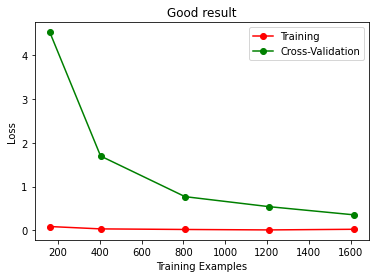

In [76]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np 

digits = load_digits()
X_1 = digits.data
y_1 = digits.target

#良好的学习结果
train_size, train_loss, test_loss = learning_curve(
                    SVC(gamma=0.001), X_1, y_1, cv=10, scoring='neg_mean_squared_error',
                    train_sizes=[0.1,0.25,0.5,0.75,1])
#在训练集占比10%、25%......处作点
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_size,train_loss_mean,'o-',color='r',
         label='Training')
plt.plot(train_size,test_loss_mean,'o-',color='g',
         label='Cross-Validation')
plt.xlabel('Training Examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('Good result')
plt.show()

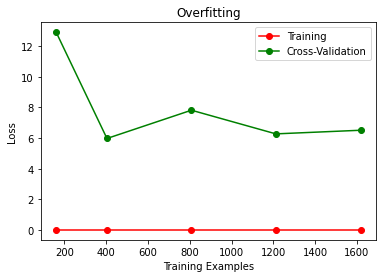

In [77]:
#改变gamma值，过拟合
#若训练loss在下降但是测试loss在上升表明过拟合了
train_size, train_loss, test_loss = learning_curve(
                    SVC(gamma=0.01), X_1, y_1, cv=10, scoring='neg_mean_squared_error',
                    train_sizes=[0.1,0.25,0.5,0.75,1])
#在训练集占比10%、25%......处作点
train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_size,train_loss_mean,'o-',color='r',
         label='Training')
plt.plot(train_size,test_loss_mean,'o-',color='g',
         label='Cross-Validation')
plt.xlabel('Training Examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('Overfitting')
plt.show()

#选取最佳gamma以避免过拟合

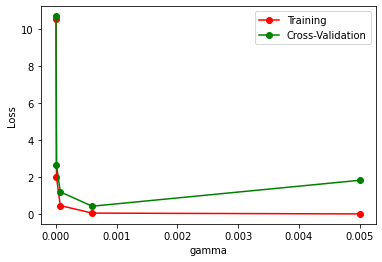

In [83]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np 


digits = load_digits()
X_1 = digits.data
y_1 = digits.target

#validation_curve可以改变参数的值
#param_range为gamma值的范围
param_range = np.logspace(-6,-2.3,5)   #-lg(6)到-lg(2.3)之间取五个值
train_loss_2, test_loss_2 = validation_curve(
                    SVC(), X_1, y_1, param_name='gamma', 
                    param_range=param_range, cv=10, scoring='neg_mean_squared_error')
#在训练集占比10%、25%......处作点
train_loss_mean_2 = -np.mean(train_loss_2,axis=1)
test_loss_mean_2 = -np.mean(test_loss_2,axis=1)

plt.plot(param_range,train_loss_mean_2,'o-',color='r',
         label='Training')
plt.plot(param_range,test_loss_mean_2,'o-',color='g',
    label='Cross-Validation')
plt.xlabel('gamma')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

#保存model的参数值

In [0]:
from sklearn.datasets import load_iris
from sklearn import svm

clf_1 = svm.SVC()
iris = load_iris()
iris_X, iris_y = iris.data, iris.target
clf_1.fit(iris_X, iris_y)

#使用pickle保存数据
import pickle
with open('save/clf_1.pickle','wb') as f:
  pickle.dump(clf_1,f)

with open('save/clf_1.pickle','rb') as f: 
  clf2 = pickle.load(f)
  print(clf_2.predict(iris_X[0:1]))

In [0]:
#使用sklearn中的joblib保存
from sklearn.externals import joblib
joblib.dump(clf_1,'save/clf_1.pkl')
clf_3 = joblib.load('save/clf_1.pkl')
print(clf_2.predict(iris_X[0:1]))